In [1]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
N = 100
P = 10
X = np.random.randn(N, P)
true_beta = np.array([3, 5, -2] + [0]*(P-3))
y = X @ true_beta + np.random.randn(N)


In [2]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize the predictors
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)


In [4]:
from sklearn.linear_model import ElasticNet

# Fit the Elastic Net model
alpha = 1.0  # Regularization strength
l1_ratio = 0.5  # Balance between L1 and L2 regularization
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
elastic_net.fit(X_train_standardized, y_train)


ElasticNet(random_state=42)

In [5]:
# Predict on the test set
y_pred = elastic_net.predict(X_test_standardized)


Mean Squared Error: 5.614278100996901


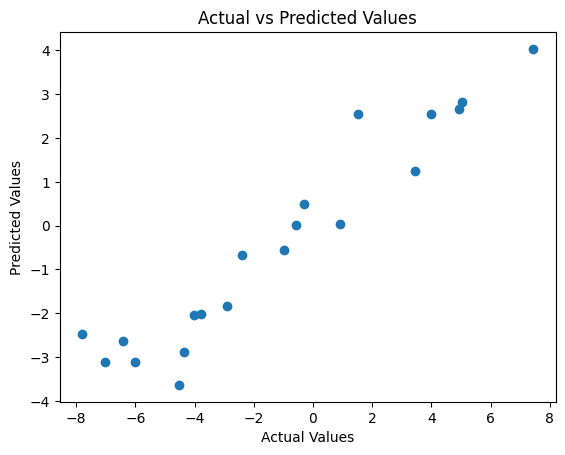

In [6]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
